In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
Atributos = tuple(["Data", "Partida", "Nome", "Nota", "Area", "Posição", "Min", "Gols", "Assist.", "Pênalti recebido", 
                "Total de chutes", "Chutes no gol", "Chutes para fora", "Trave", "Chutes interceptados", "Chances perdidas", 
                "Impedimentos", "Passes decisivos", "Quase gol", "Passes completados", "Passes longos completados", 
                "Cruzamentos completos", "Dribles completos", "Toques", "Faltas recebidas", "Pênalti cometido", "Faltas cometidas", 
                "Posse de bola perdida", "Driblado", "Perigo afastado", "Interceptações", "Bolas recuperadas", 
                "Vitória em duelos por baixo", "Vitória em duelos por cima", "Defesas", "Gols sofridos", "Pênalti defendido",
                "Reposição de soco", "Erros que terminaram em chute adversário", "Defesa pelo alto", "Seleção"])

a = pd.read_table("./data/def.txt", sep = ';', decimal=".",header=None, names=Atributos, parse_dates=['Data'], dayfirst=True)

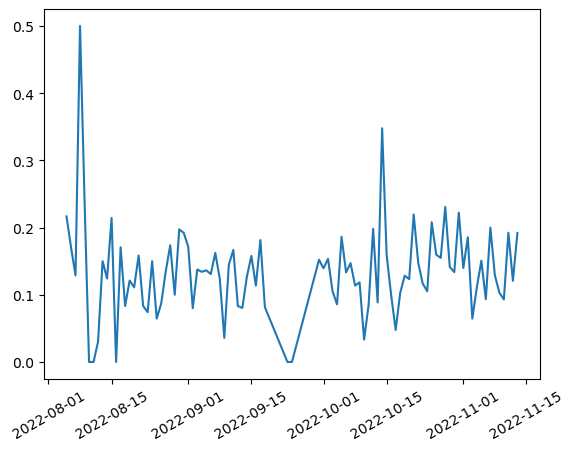

In [31]:
a = a.fillna(0)
a.head()
plt.plot(a.groupby("Data")["Gols"].mean())
plt.xticks(rotation = 30)
plt.show()

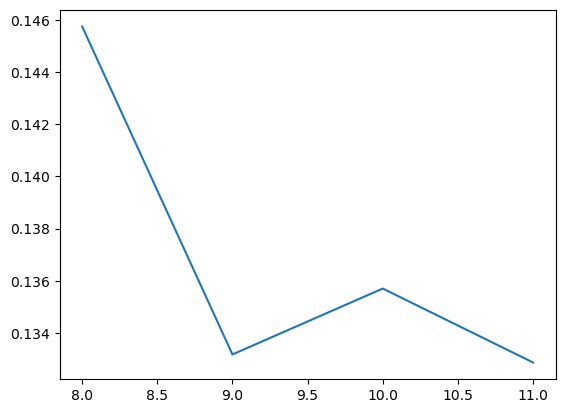

In [32]:
plt.plot(a.groupby(a.Data.dt.month)["Gols"].mean())
plt.show()

In [6]:
df.loc[:,["Dia", "Mes", "Ano"]]

,Dia,Mes,Ano
0,13,11,2022
1,13,11,2022
2,13,11,2022
3,13,11,2022
4,13,11,2022
...,...,...,...
9542,09,09,2022
9543,03,09,2022
9544,28,08,2022
9545,13,08,2022
